In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_test.csv
/kaggle/input/crime-prediction-b1-fall-inter-22-23/sample_submission.csv
/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_train.csv


In [ ]:
# https://www.kaggle.com/competitions/crime-prediction-b1-fall-inter-22-23/overview

In [3]:
# if error run this cell twice

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_train.csv")
testdata = pd.read_csv("/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_test.csv")
SS = pd.read_csv("/kaggle/input/crime-prediction-b1-fall-inter-22-23/sample_submission.csv")

In [5]:
X = dataset.drop(["ViolentCrimesPerPop"], axis=1)
Y = dataset.loc[:,"ViolentCrimesPerPop"]
Z = testdata.copy()
print(X.shape)
print(Y.shape)
print(Z.shape)

(1595, 89)
(1595,)
(399, 89)


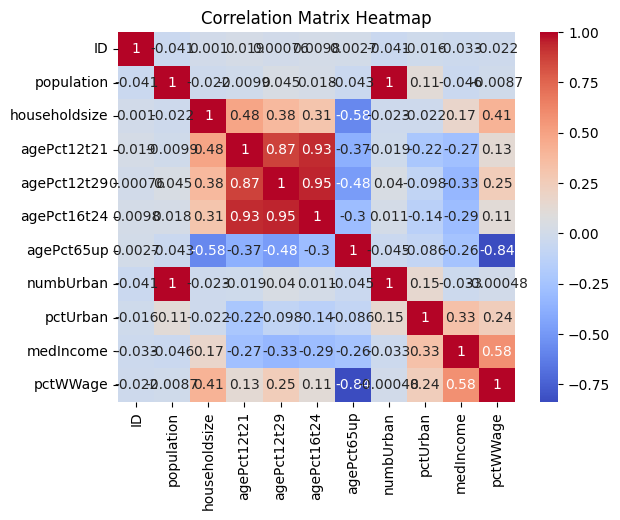

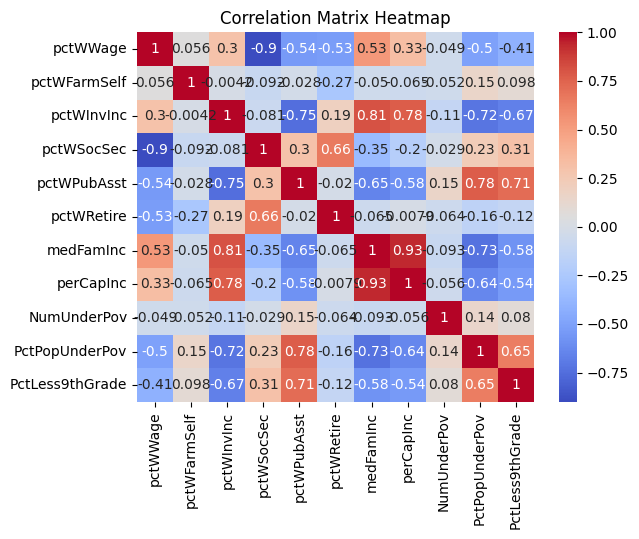

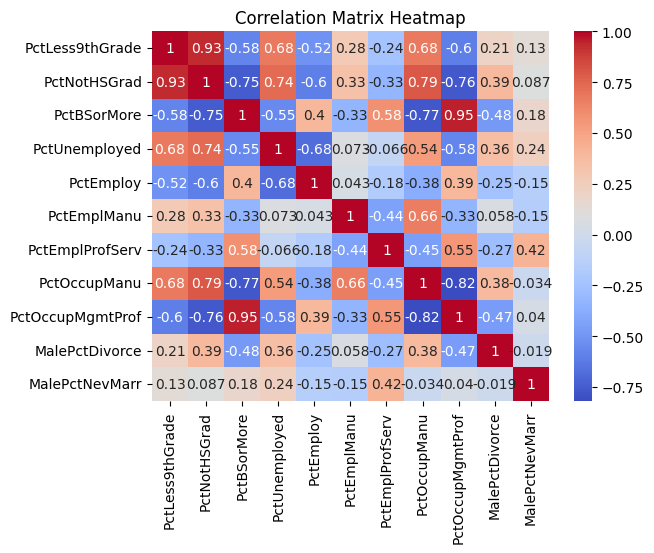

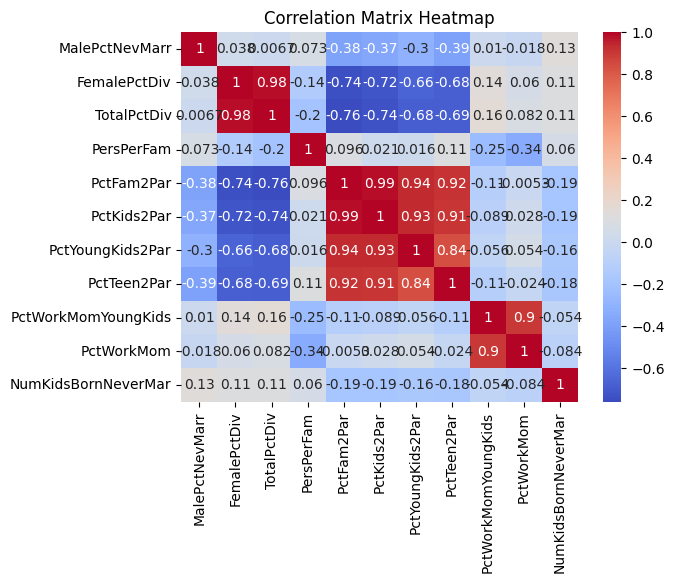

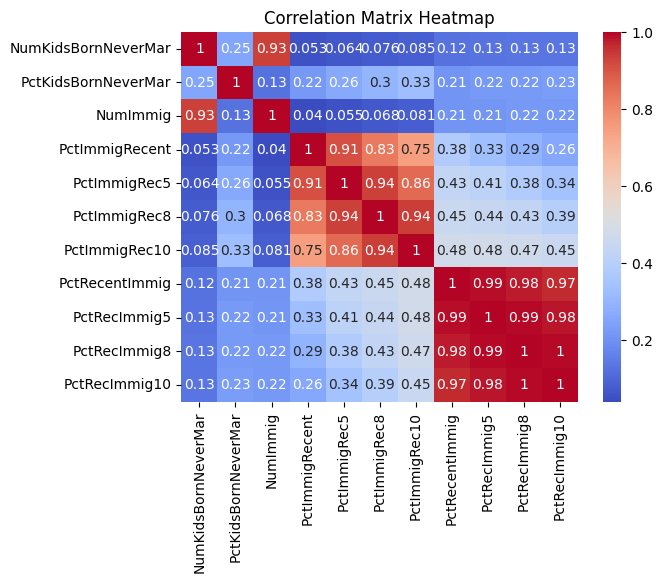

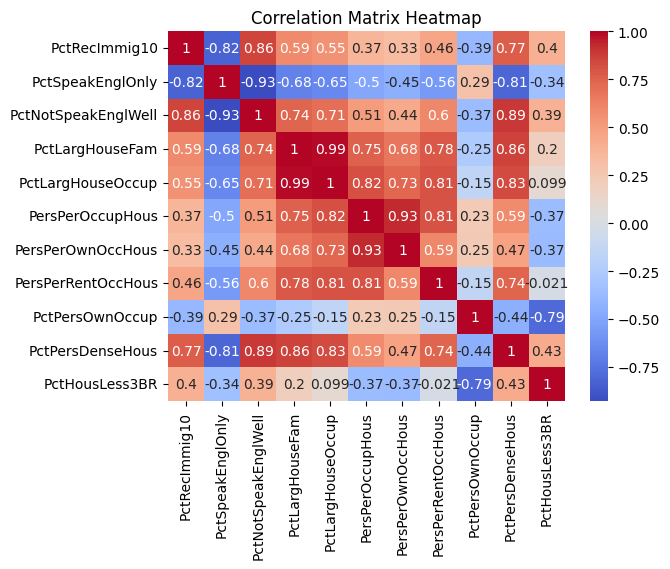

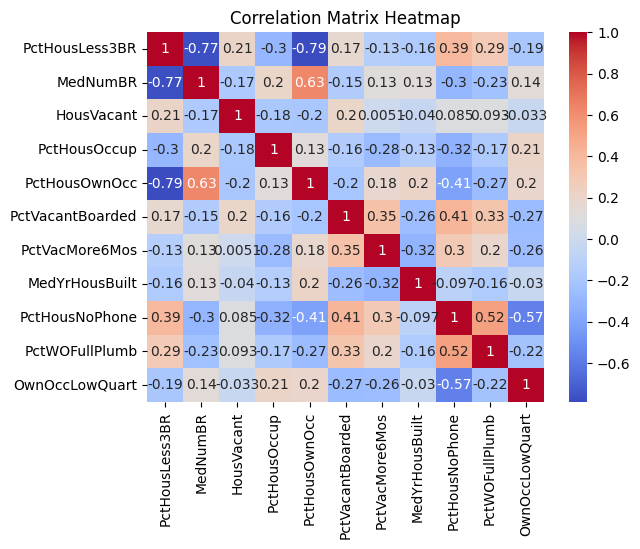

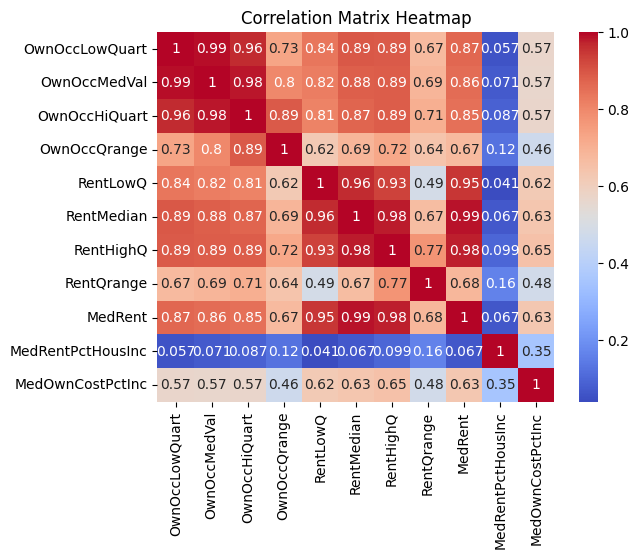

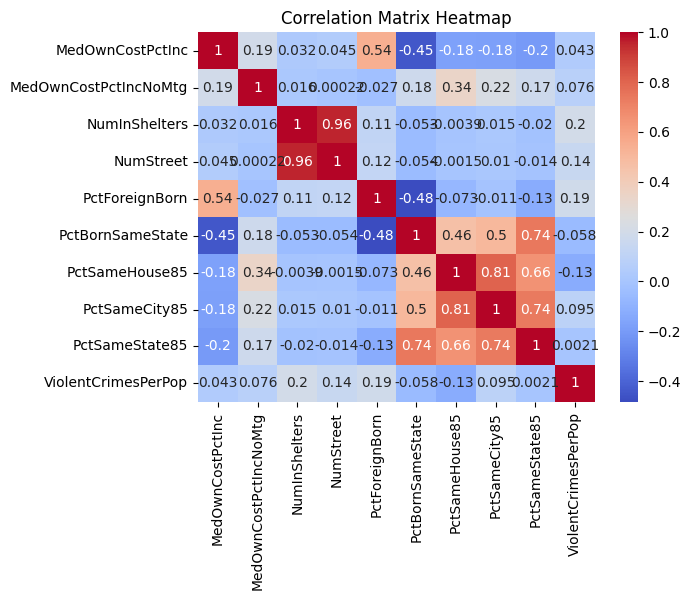

In [6]:
# Visualisation

df1 = pd.read_csv('/kaggle/input/crime-prediction-b1-fall-inter-22-23/crime_train.csv')

# df = []
# rip automation
# for i in range(0, 9):
#     print(i*10, ":", ((i+1)*10)+1)
#     df.append(df1.iloc[:, i+1:((i+1)*10)+1])
#     correlation_matrix = df[i].corr()
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#     plt.title('Correlation Matrix Heatmap')
#     plt.show()


df = df1.iloc[:, 0:11]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 10:21]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 20:31]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 30:41]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 40:51]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 50:61]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 60:71]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 70:81]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df = df1.iloc[:, 80:91]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [7]:
List_bad = ["agePct65up",
"pctWInvInc",
"PctOccupMgmtProf",
"NumKidsBornNeverMar",
"NumImmig",
"PctSpeakEnglOnly",
"PctHousLess3BR",
"MedRentPctHousInc",
"PctBornSameState"]

In [ ]:
# cleaning data
# didnt work rip

# X = dataset.drop(List_bad, axis=1)
# X = X.drop("ViolentCrimesPerPop", axis=1)
# Y = dataset.loc[:,"ViolentCrimesPerPop"]
# Z = testdata.drop(List_bad, axis=1)

# print(X.shape)
# print(Y.shape)
# print(Z.shape)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)
print(len(X_test))

80


In [21]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_sc = scaler.fit_transform(X_train)
Xt_sc = scaler.transform(X_test)
Z_sc = scaler.transform(Z)

In [22]:
L_reg = linear_model.LinearRegression()

model = L_reg.fit(X_sc, Y_train)

y_pred = model.predict(Xt_sc)
print(len(Y_test))
print(len(y_pred))


80
80


In [23]:
from sklearn.metrics import r2_score

model_score = r2_score(Y_test, y_pred)
print(Y_test.shape)
print(model_score)

(80,)
0.5715997799495538


In [24]:
z_pred = model.predict(Z_sc)
print(z_pred.shape)

(399,)


In [25]:
ids = SS.loc[:, "ID"]
df = pd.DataFrame({"ID": ids,
                   "Prediction" : z_pred})

In [26]:
df.to_csv("/kaggle/working/submission_final4.csv", index=False)